In [1]:
from comet_ml import API
import comet_ml
import io
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict
import time

from sklearn.linear_model import HuberRegressor

In [2]:
sns.set(context='paper', style="whitegrid", font_scale=3, font = 'serif')
colors = [
    'skyblue', 'orange', 'steelblue', 'gold', '#f58231', 'red' 
]
%matplotlib inline
linewidth = 3

In [558]:
datafile='rand_preprocessed.pt'
device = torch.device("cpu")

In [559]:
showers = torch.load(datafile)

In [560]:
len(showers)

47

In [561]:
showers[0]

Data(edge_attr=[1233090, 1], edge_features=[1233090, 7], edge_index=[2, 1233090], orders=[58, 1233090], orders_preprocessed=[58], pos=[123309, 5], shower_data=[123309, 8], x=[123309, 10], y=[123309])

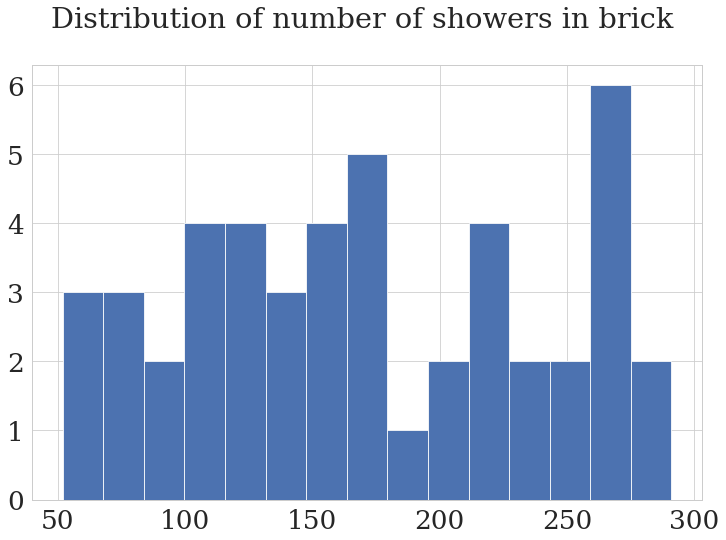

In [562]:
lens=[]

for shower in showers:
    lens.append(len(np.unique(shower.y)))

plt.figure(figsize=(12, 8))
plt.title("Distribution of number of showers in brick \n")
plt.hist(lens, bins=15);
plt.savefig('showers_per_brick_distr.pdf', bbox_inches='tight')
plt.show()

In [563]:
showers_data = []
for shower in showers:
    showers_data.append(shower.shower_data)

In [564]:
showers_data = [item for sublist in showers_data for item in sublist]

In [565]:
len(showers_data)

4322704

In [566]:
numtracks = []
E_true = []

for shower in showers_data:
    numtracks.append(shower[-2].numpy())
    E_true.append(shower[0].numpy())


In [567]:
max(np.array(numtracks))

2973.0

In [568]:
max(np.array(E_true))

118.960976

In [582]:
unique, index = np.unique(E_true, return_index=True)


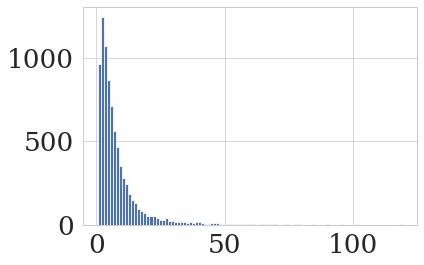

In [603]:
plt.hist(unique, bins=100);

In [584]:
len(unique)

8017

In [600]:
ntrck_unique = np.array(numtracks)[index]

In [601]:
E_true_sorted = unique.copy()

In [602]:
E_true_sorted.sort()

In [652]:
indexes_0_5_2 = [list(unique).index(E_true_sorted[i]) for i in range(1291)]
#1284
indexes_2_3 = [list(unique).index(E_true_sorted[i]) for i in range(1291, 2330)]
#1033
indexes_3_4 = [list(unique).index(E_true_sorted[i]) for i in range(2330, 3227)]
#888
indexes_4_5_5 = [list(unique).index(E_true_sorted[i]) for i in range(3227, 4340)]
#1110
indexes_5_5_7_5 = [list(unique).index(E_true_sorted[i]) for i in range(4340, 5374)]
#1032
indexes_7_5_11 = [list(unique).index(E_true_sorted[i]) for i in range(5374, 6476)]
#1102
indexes_11_22 = [list(unique).index(E_true_sorted[i]) for i in range(6476, 7565)]
#1088

In [ ]:
indx = [indexes_0_5_2, indexes_2_3, indexes_3_4, indexes_4_5_5,
       indexes_5_5_7_5, indexes_7_5_11, indexes_11_22]

In [670]:
ind_name = ['from 0.5 to 2 Gev', 'from 2 to 3 Gev', 'from 3 to 4 Gev', 'from 4 to 5.5 Gev',
            'from 5.5 to 7.5 Gev', 'from 7.5 to 11 Gev', 'from 11 to 22 Gev', ]

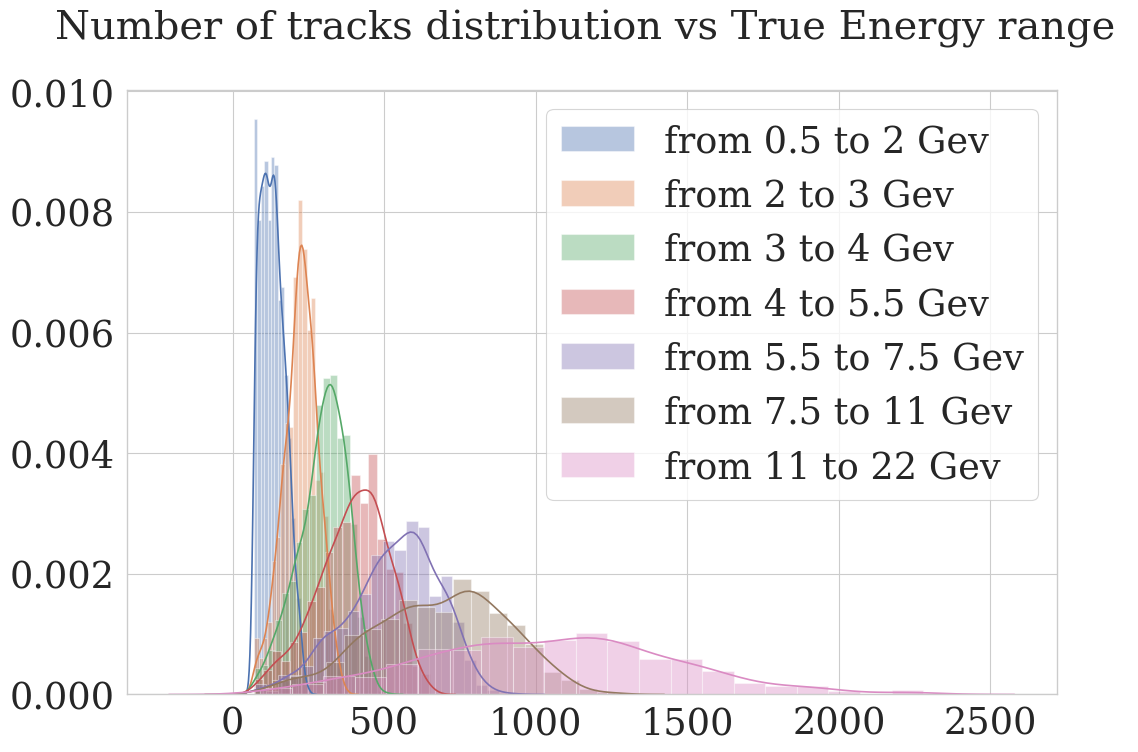

In [675]:
plt.figure(figsize=(12, 8), dpi=100)
plt.title("Number of tracks distribution vs True Energy range \n")

for ind, name in zip(indx, ind_name):
    sns.distplot(ntrck_unique[ind], hist=True, rug=False, label=name)

plt.legend()    
plt.savefig("E_true_vs_numtracks_distr.pdf", bbox_inches='tight')
plt.show()

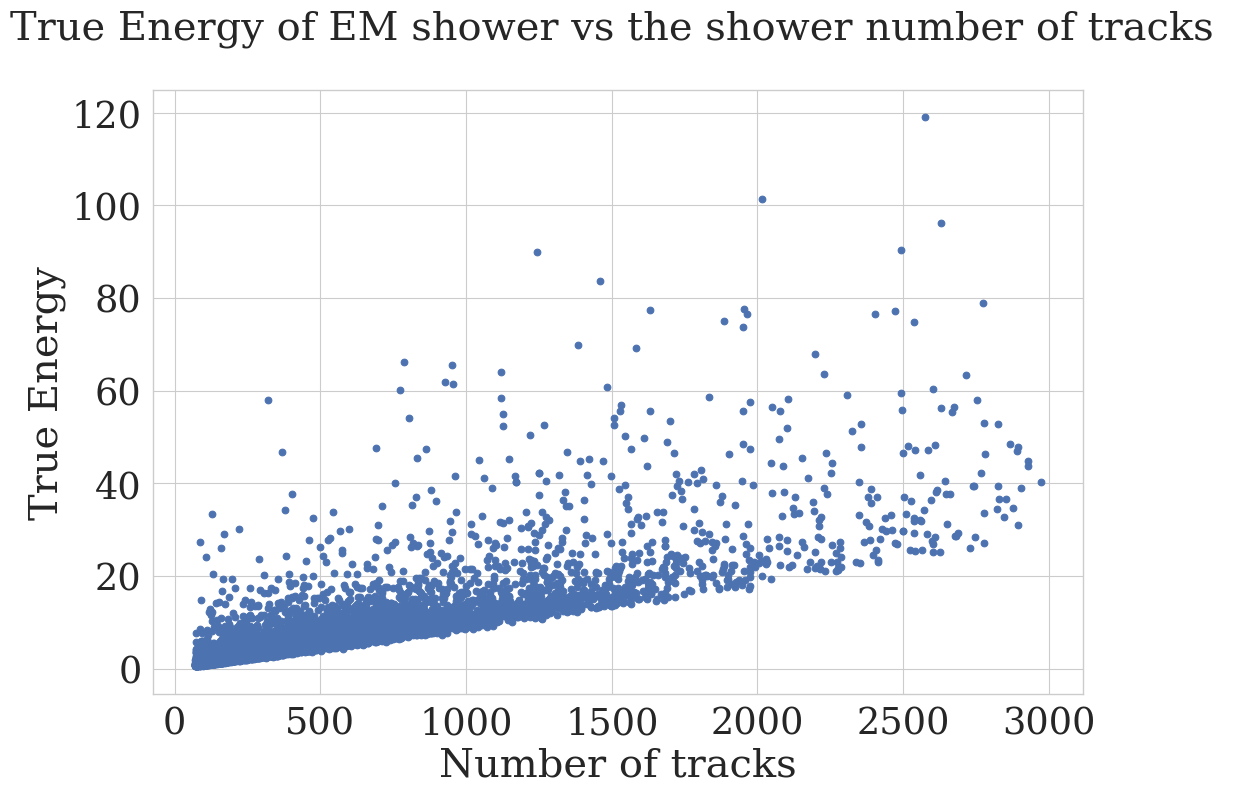

In [599]:
plt.figure(figsize=(12, 8), dpi=100)
plt.title("True Energy of EM shower vs the shower number of tracks \n")
plt.scatter((np.array(numtracks)[index]),unique)
plt.ylabel("True Energy")
plt.xlabel("Number of tracks")
# plt.ylim
plt.savefig("E_true_vs_numtracks.pdf", bbox_inches='tight')
plt.show()

# Energy resolution dependence on number of showers in a brick 

In [169]:
def E_pred(E_raw, E_true, nshowers):
    #E_raw, E_true -- .npy files
    #name - string 
    E_raw = np.load(E_raw)
    E_true = np.load(E_true)
    assert(len(E_raw)==len(E_true))
    
    r = HuberRegressor()
    r.fit(X=E_raw.reshape((-1, 1)), y=E_true)
    E_pred = r.predict(E_raw.reshape((-1, 1)))
    
    plt.figure(figsize=(10, 5), dpi=100)
    plt.title('Energy distribution comparison for '+ nshowers + ' per brick \n')
    sns.distplot(E_true, bins = 100, hist = True, label='True Energy')
    sns.distplot(E_pred, bins = 100, hist = True,  label='Predicted Energy')
    plt.legend(loc='upper right')
    plt.savefig(nshowers + ".pdf", bbox_inches='tight')
    plt.show()
    
    
    return E_pred, E_true
    

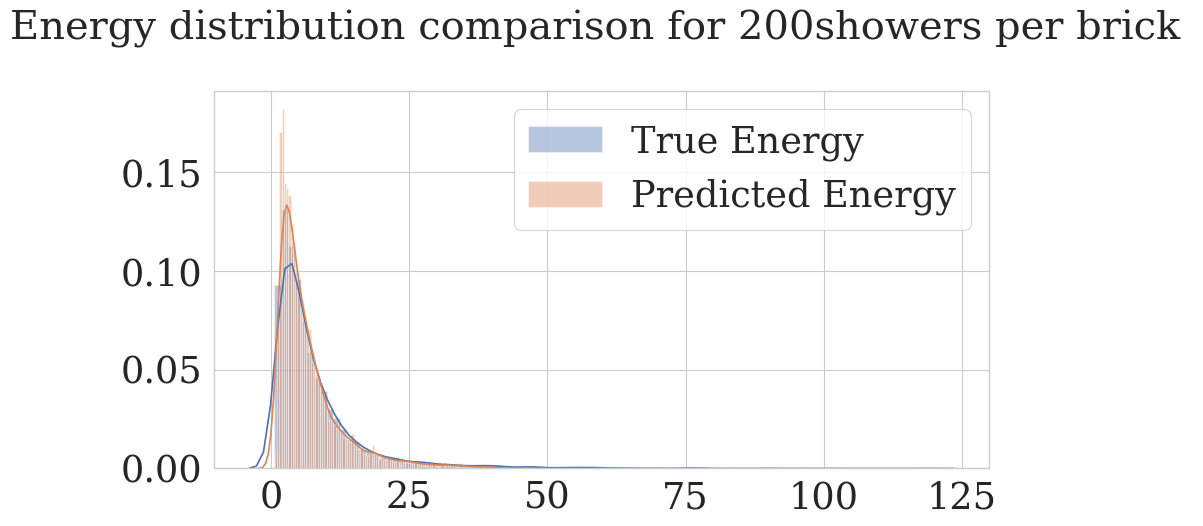

In [170]:
E_pred_200, E_true_200 = E_pred('E_pred.npy', 'E_true.npy', '200showers')

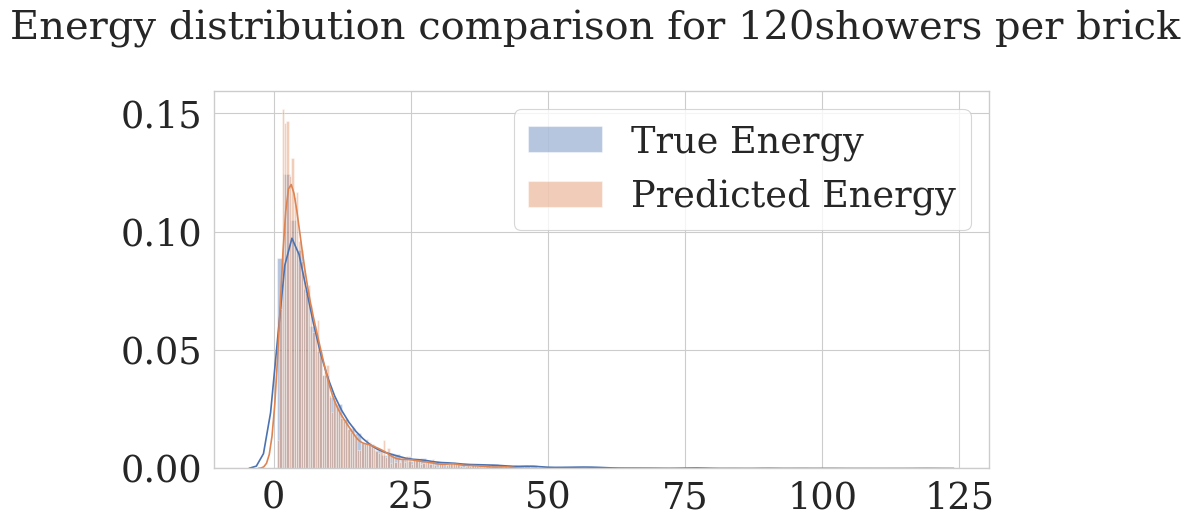

In [171]:
E_pred_120, E_true_120 = E_pred('E_pred_120shower.npy', 'E_pred_true_120shower.npy', '120showers')

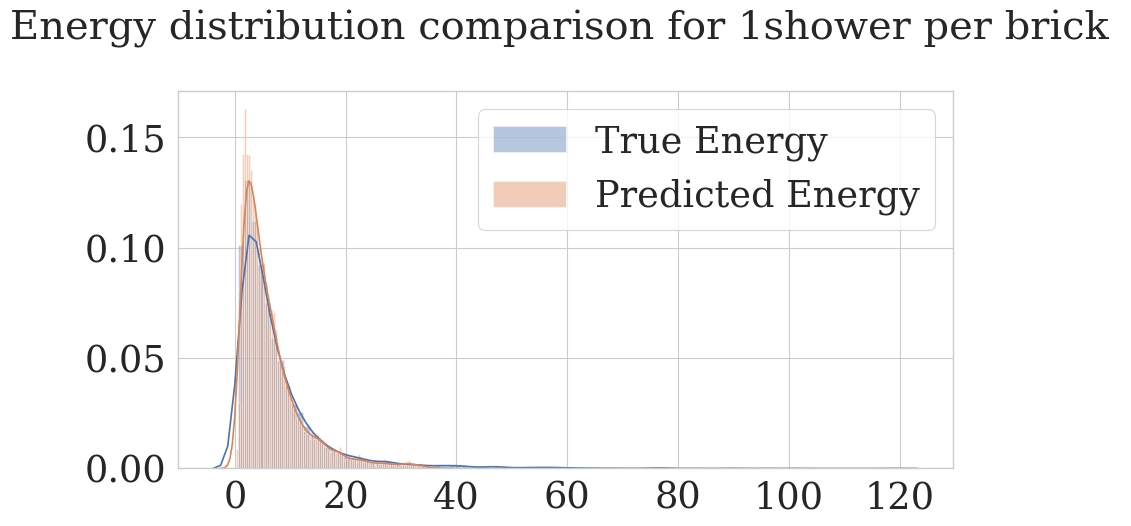

In [172]:
E_pred_1, E_true_1 = E_pred('E_pred_1shower.npy', 'E_pred_true_1shower.npy', '1shower')

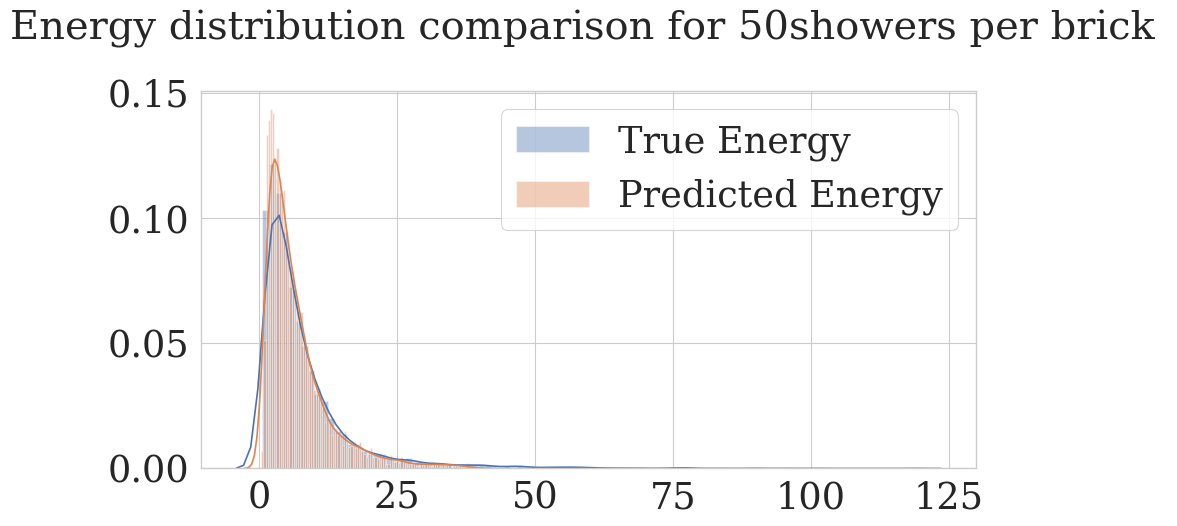

In [173]:
E_pred_50, E_true_50 = E_pred('E_pred_50shower.npy', 'E_pred_true_50shower.npy', '50showers')

In [174]:
nshowers_dict = {'1shower': [], '50showers': [],  '120showers': [], '200showers': []}

In [191]:
ER_dict = {'1shower': [], '50showers': [],  '120showers': [], '200showers': [], 
           'baseline': [0.35, 0.32, 0.25, 0.22, 0.18, 0.16, 0.12]}

In [175]:
index_list_1 = [1284, 2317, 3205, 4315, 5347, 6449, 7537]
index_list_50 = [1063, 1907, 2669, 3638, 4537, 5512, 6497]
index_list_120 = [775, 1491, 2092, 2893, 3664, 4496, 5366]
index_list_200 = [1010, 1945, 2762, 3792, 4740, 5741, 6750]

In [176]:
indices_list = [index_list_1, index_list_50, index_list_120, index_list_200]

In [177]:
E_pred_list = [E_pred_1, E_pred_50, E_pred_120, E_pred_200]
E_true_list = [E_true_1, E_true_50, E_true_120, E_true_200]

In [196]:
n = ['1shower', '50showers',  '120showers', '200showers', 'baseline']

In [179]:
def Energy_boxes(E_pred, E_true, nshowers, index_list):
     #nshowers - string
    
    #Dividing Energy into 'boxes'
    E_true_sorted = E_true.copy()
    E_true_sorted.sort()
    
    E_true_sorted = E_true_sorted.tolist()
    E_true = E_true.tolist()
    
    ## return indices for every 'box' of Energy (from 0 to 2 GeV, from 2 to 3 GeV...)
    nshowers_dict[nshowers].append([E_true.index(E_true_sorted[i]) for i in range(index_list[0])])
    for i in range(len(index_list)-1):
        nshowers_dict[nshowers].append([E_true.index(E_true_sorted[i]) for i in range(index_list[i], 
                                                                                          index_list[i+1])])    

In [180]:
for i in range(len(indices_list)):
    Energy_boxes(E_pred_list[i], E_true_list[i], n[i], indices_list[i])

In [192]:
def ER(ind, E_pred, E_true):
    return np.std((np.array(E_true)[ind] - np.array(E_pred)[ind])
                 /np.array(E_true)[ind])

In [193]:
for i in range(len(E_pred_list)):
    nshowers = n[i]
    for ind in nshowers_dict[nshowers]:
        ER_dict[nshowers].append(ER(ind, E_pred_list[i], E_true_list[i]))

In [210]:
def plot_ER(nshowers):
    E_boxes = [2, 3, 4, 5.5, 7.5, 11, 22] 
    
    
    plt.figure(figsize=(12, 8), dpi=100)
    plt.title('Energy resoltion comparison for different number of showers in a brick \n')
    
    for n in nshowers:
        plt.plot(E_boxes, ER_dict[n], marker = '*', label=n)


    plt.xlabel("E (GeV)");
    plt.ylabel("ER");
    
    plt.legend()

    plt.savefig("ER_comparison.pdf", bbox_inches='tight')
    plt.show()

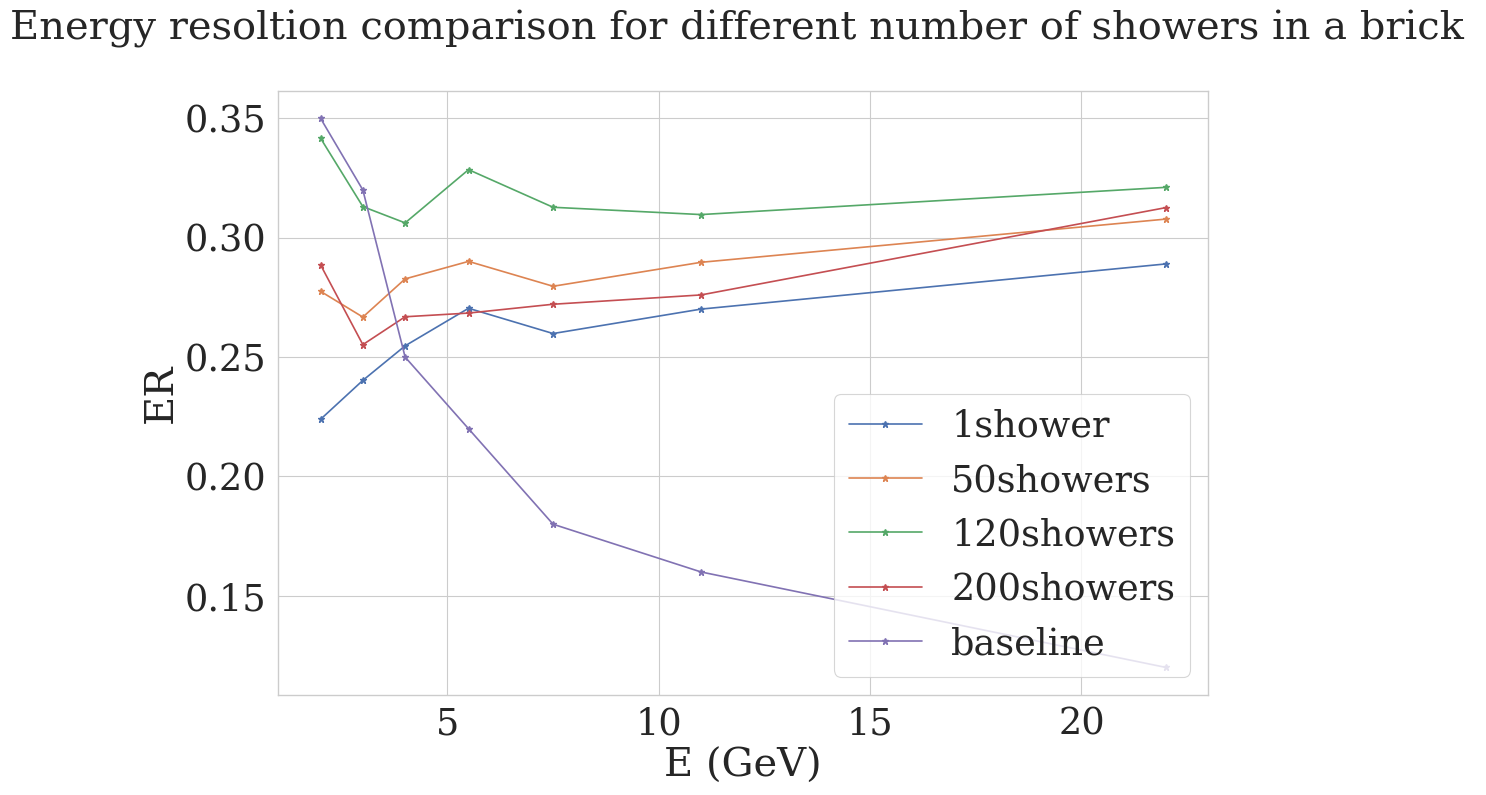

In [211]:
plot_ER(n)